# 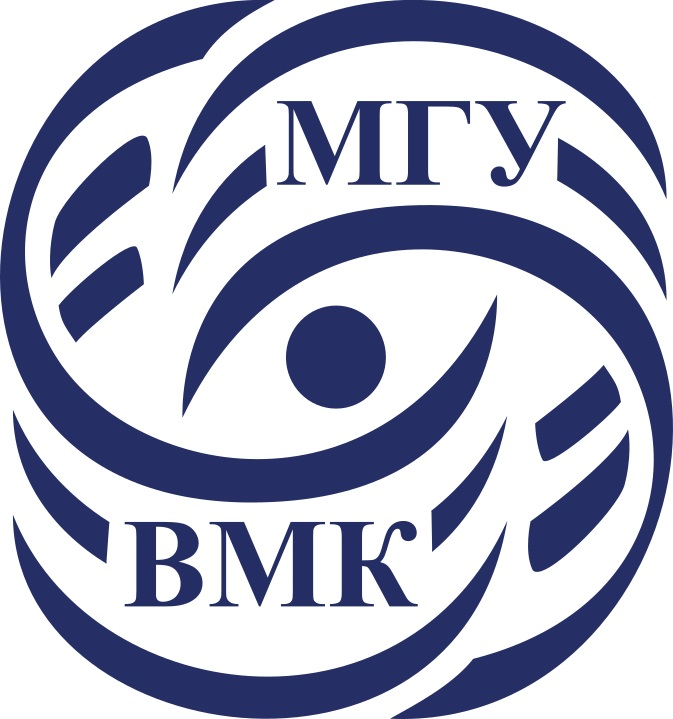

# Машинное обучение. ВМК МГУ

# Практическое задание 4: Линейные модели: классификация

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2024"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Научиться работать с разными типами признаков;
* Понять, чем отличаются разные регуляризаторы;
* Приятно провести осенний вечер, предсказывая дождь.

---

<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: до 30 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [ ]:
# !!! Данный блок будет работать только в Google-Colab !!!
! gdown 10k8Hwn9kpK9SpK4IEj4-EaWQZqgYT5-Q
! pip install -r /content/requirements_2024_25_for_colab_small.txt

Проверим версию библиотеки:

In [1]:
import catboost
assert(catboost.__version__ == '1.2.7')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2024"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Часть 0. Юнит-тестирование (3 балла)

Ниже импортируются классы, которые необходимо реализовать самостоятельно. Правильность реализации проверяется юнит-тестами. Максимально за юнит-тесты можно получить $10$ баллов. Шаблон для классов находится в отдельной вкладке.

**После того, как вы локально реализовали и протестировали модуль Task.py, загрузите его в сессионное хранилище: нажмите знак папки слева, затем знак загрузки. Будьте внимательны, по окончании сессии хранилище очистится -- вам нужно будет заново загрузить соответствующие модули**

**<font color=red>Обратите внимание!</font>** Если Ваша реализация счётчиков работает очень долго (скажем, больше 2 секунд: можно посмотреть в системе, сколько оно тестировалось), то вероятнее всего, Вы плохо векторизовали код, и ваш ноутбук, перед вопросом 16, будет долго работать. Попробуйте использовать `np.vectorize`



In [4]:
from Task import MyOneHotEncoder, SimpleCounterEncoder, FoldCounters

## Часть 1. Классификация

Напомним, что бинарная линейная классификация с классами $0$ и $1$ &mdash; это модель следующего вида:
$a(x)= \begin{cases}
1, & \langle w, x \rangle + b > 0; \\
0, & \text{иначе.}
\end{cases}$

где  $w \in \mathbb{R}^d$,  $b \in \mathbb{R}$. В логистической регрессии $p(x) = \frac{1}{1 + e^{-[\langle w, x \rangle + b]}}$ интерпретируется как вероятность принадлежности к первому классу. Если объект $x$ принадлежит классу $1$ с вероятностью $p(x)$, то правдоподобие записывается в виде $\prod_{i=1}^{n} p(x_i)^{y_i} \cdot \left( 1 - p(x_i) \right)^{1 - y_i}$. Обучить логистическую регрессию означает найти параметры $w$ и $b$, которые максимизируют указанное правдоподобие. Что эквивалентно минимизации $- \sum_{i=1}^n y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i))$. Указанная функция потерь называет логистической (или логлосс).

По тем же причинам, что и в линейной регрессии, к логистической функции потерь добавляется регуляризация (стандартно это $l_2$).

Рассмотрим пару модельных примеров, в которых целевая переменная $y$ линейно зависит от двух независимых величин $x_1$ и $x_2$, плюс случайный шум.

In [5]:
np.random.seed(1)
X = np.random.randn(100, 2)
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

Обучим логистическую регрессию, двумя методами LBFGS и Newton-CG. Для простоты восприятия, можно считать, что первый похож на градиентный спуск, а второй на метод Ньютона

In [6]:
from sklearn.linear_model import LogisticRegression

clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

In [7]:
x1 = np.linspace(0.5, 3.5, 1000)
x2 = np.linspace(-0.5, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)

def loss(X1, X2, X, Y):
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    p = sigmoid(X1[None] * X[:, 0, None, None] + X2[None] * X[:, 1, None, None]) # 100, 200, 200
    return -np.sum(Y[:, None, None] * np.log(p) + (1 - Y[:, None, None]) * np.log(1 - p), axis=0) + 0.5 * (X1**2 + X2**2)

Z = loss(X1, X2, X, Y)

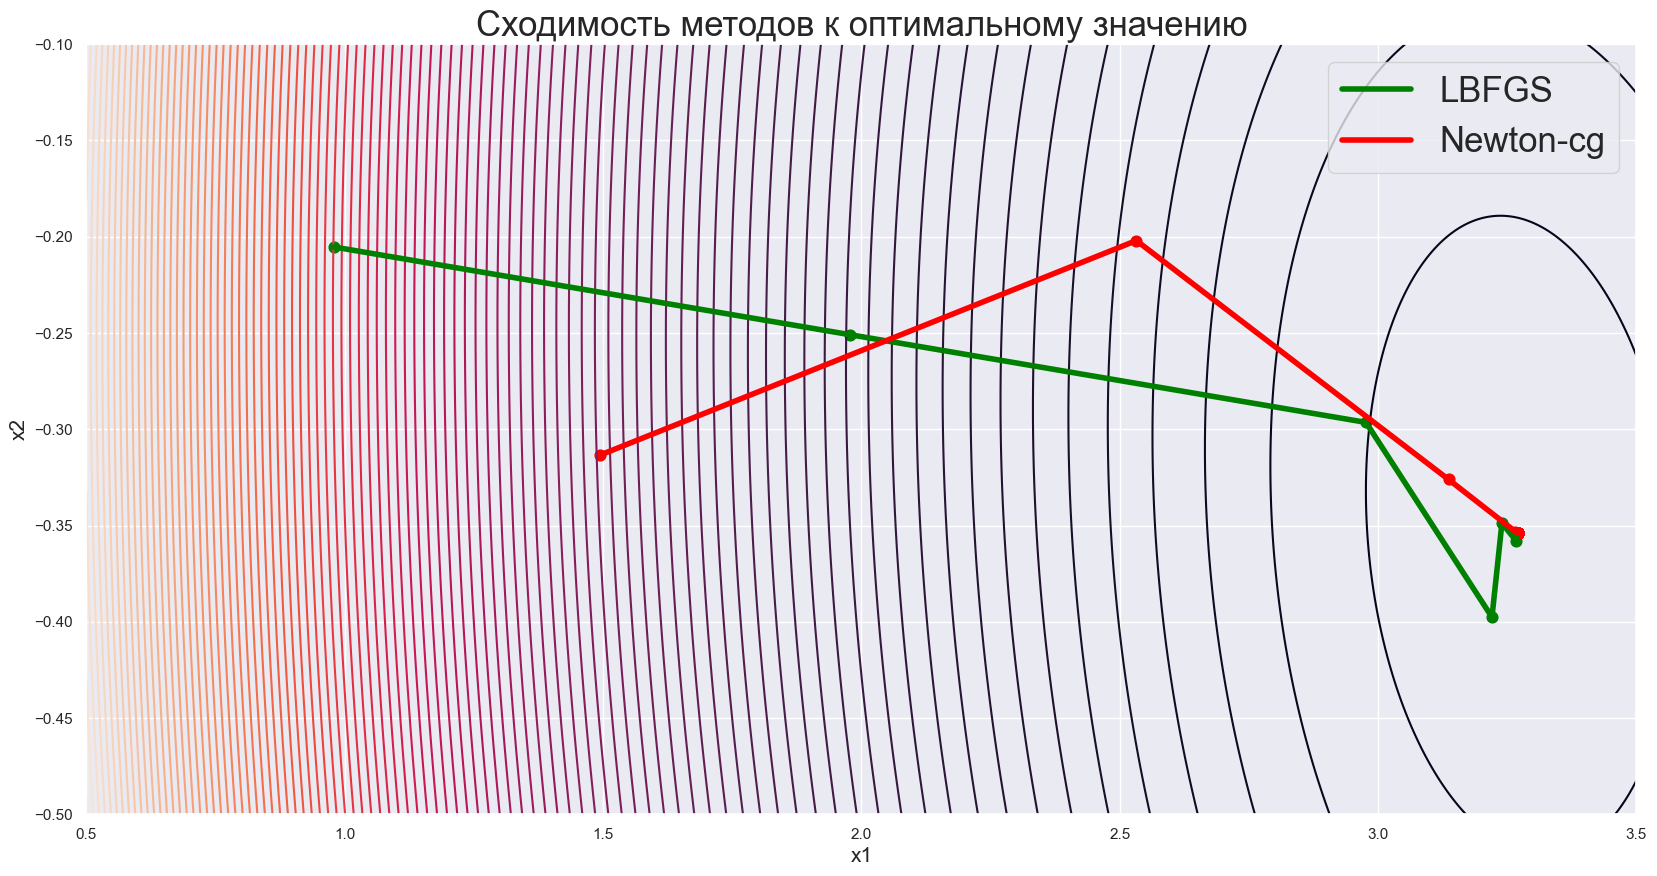

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

Рассмотрим второй пример. **Внимание**, здесь $x_2$ уже из другого распределения!

In [9]:
np.random.seed(1)
X = np.hstack((np.random.randn(100, 1), np.random.uniform(7, 12, (100, 1))))
Y = np.random.randn(100) * 1. + X[:, 0] * 3 - X[:, 1] * 0.12
Y = np.where(Y > 0, 1, 0)

In [10]:
clf_lbfgs = LogisticRegression(C=1, solver='lbfgs', max_iter=1, warm_start=True, fit_intercept=False)
clf_newton_cg = LogisticRegression(C=1, solver='newton-cg', max_iter=1, warm_start=True, fit_intercept=False)

coefs_lbfgs = []
coefs_nc = []

for it in range(1000):
    clf_lbfgs.fit(X, Y)
    coefs_lbfgs.append(clf_lbfgs.coef_[0])
    clf_newton_cg.fit(X, Y)
    coefs_nc.append(clf_newton_cg.coef_[0])

coefs_lbfgs = np.array(coefs_lbfgs)
coefs_nc = np.array(coefs_nc)

x1 = np.linspace(0, 3.5, 1000)
x2 = np.linspace(0.01, -0.1, 1000)
X1, X2 = np.meshgrid(x1, x2)
Z = loss(X1, X2, X, Y)

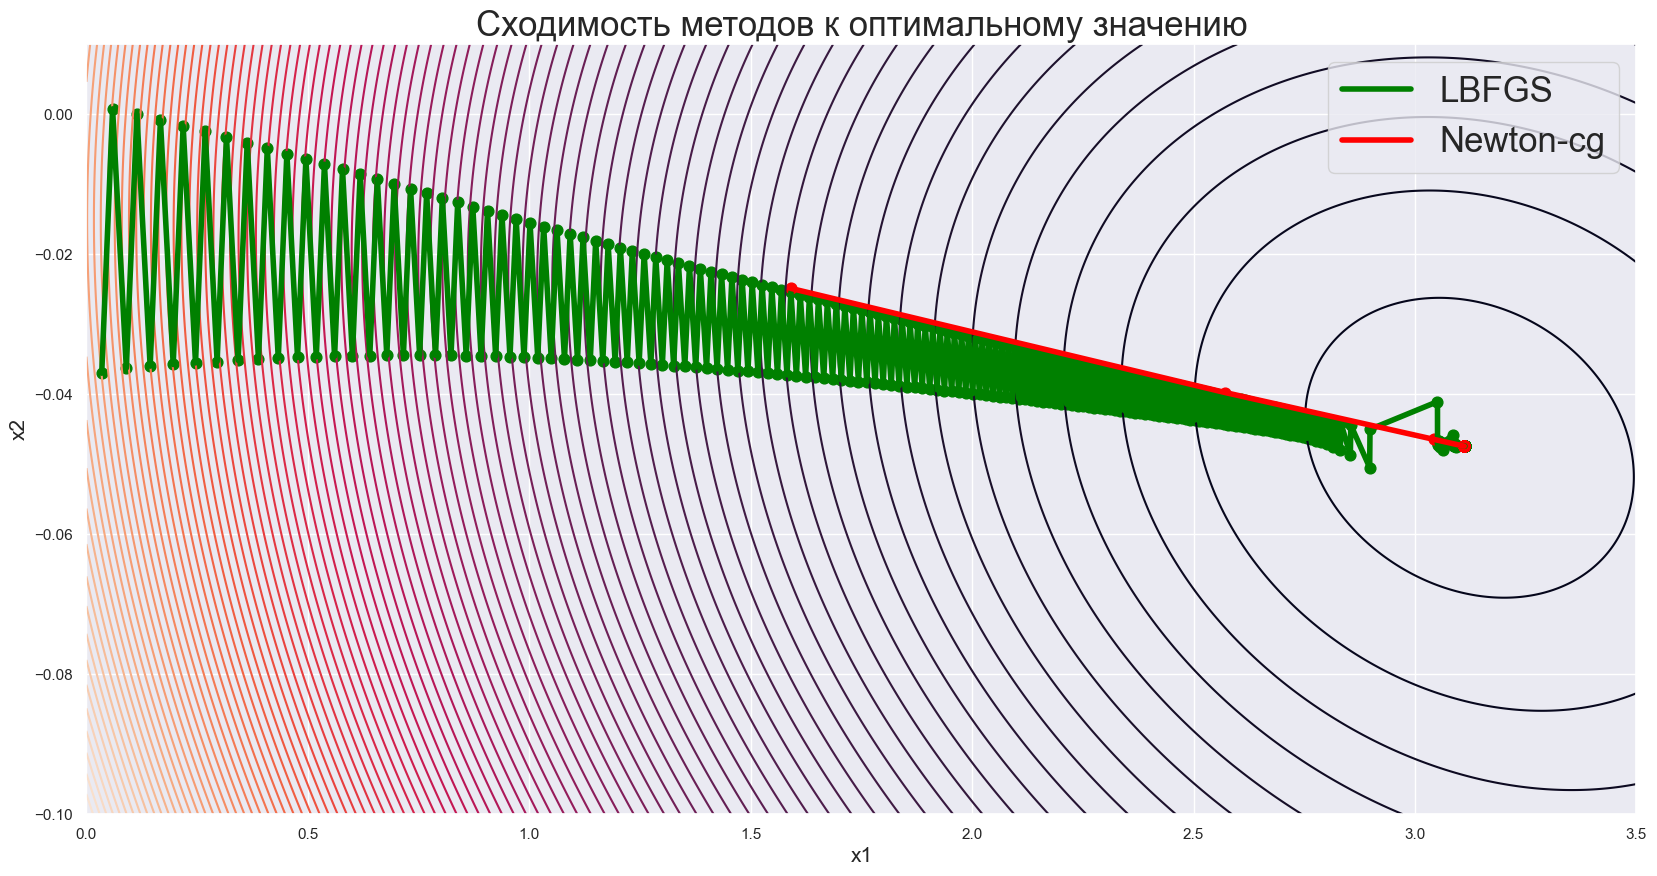

In [11]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
plt.contour(X1, X2, Z, levels=100)
plt.plot(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", linewidth=4, label="LBFGS")
plt.scatter(coefs_lbfgs[:, 0], coefs_lbfgs[:, 1], color="green", s=60)
plt.plot(coefs_nc[:, 0], coefs_nc[:, 1], color="red", linewidth=4, label="Newton-cg")
plt.scatter(coefs_nc[:, 0], coefs_nc[:, 1], color="red", s=60)
plt.legend(fontsize=25)
plt.xlabel("x1", size=15)
plt.ylabel("x2", size=15)
plt.title("Сходимость методов к оптимальному значению", size=25)
plt.show()

## <font color='DarkOrange'> **Задание 1 [0.7 балла]** </font>

Как видим, метод LBFGS плохо работает на неотмасштабированных данных. Это общее свойство всех методов первого порядка (т.е. использующих только первую производную). Ньютоновские же методы хорошо справляются с подобными ситуациями. В таком случае, почему LBFGS является методом по умолчанию, а не Newton-CG?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Основными причинами такого выбора метода по умолчанию, я считаю:
1. **LBFGS** задействует ощутимо меньше вычислительных ресурсов, так как не требует полного вычисления матрицы Гессе, а также их обращения
2. Так как **LBFGS** более прост в настройке (менее чувствтвителен к перебору гиперпараметров, то его легче использовать для большего спектра задач
3. **LBFGS** менее чувствителен к шуму, как метод первого порядка

-----------
<font color="white" style="opacity:0.2023"></font>

Сейчас мы намеренно сгенерируем случайные данные с ошибкой.

In [12]:
X1 = []
X2 = []

for i in range(100):
    np.random.seed(1)
    x1 = np.random.uniform(0, 5)
    x2 = np.random.uniform(0, 5)
    X1.append(x1)
    X2.append(x2)

X1 = np.array(X1)
X2 = np.array(X2)
X = np.hstack((X1[:, None], X2[:, None]))

Y = []

for i in range(100):
    p = 1 / (1 + np.exp(-(X1[i] + X2[i] - 5)))
    y = np.random.choice([0, 1], p = [1 - p, p])
    Y.append(y)

Y = np.array(Y)

В этом код генерируется $100$ одинаковых примеров. Только метки классов отличаются.

## <font color='DarkOrange'> **Задание 2 [0.35 балла]** </font>

Почему в этом коде генерируется $100$ одинаковых примеров, хотя используется random.seed?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>

Потому что `random.seed` на каждый итерации цикла обновляется, а значит обновляется и генератор псевдослучайных чисел. По сути, мы просто каждый раз начинаем считывать последовательность чисел с самого начала.

Для избежания подобной генерации `random.seed` необходимо устанавливать (или обновлять) за пределами цикла генерации данных.

-----------
<font color="white" style="opacity:0.2023"></font>

Поскольку все записи у нас идентичны, то каждому объекту обучающей выборки логистическая регрессия предскажет одинаковую вероятность принадлежности к классу $1$.

## <font color='DarkOrange'> **Задание 3 [1.4 балла]** </font>

Какую вероятность принадлежности к классу $1$ предскажет логистическая регрессия в этом случае?

<font color='LightSteelBlue'>**Замечание**</font> В качестве ответа подразумевается некий общий способ получения этого числа помимо прямого обучения логистической регрессии.

<font color='MediumOrchid'>**Ваш ответ тут:**</font>
Так как обучающая выборка плоха, то модель скорее всего выродится и все веса признаков занулятся, ибо они никак не отражат то, к какому классу будут принадлежать итоговые объекты.

Однако мы можем предсказать то, к какому классу будут отнесены объекты в данном случае — вероятность принадлежности к классу 1 будет $\frac{k}{n}$, где $n$-общее количество идентичных объектов, а $k$ - количество объектов, принадлежащик к классу 1.

Как я получил данный результат:
1. Возьмём общую формулу функции логарифмического правдоподобия: $\mathcal{L}(p) = - \bar{y} \log p - (1 - \bar{y}) \log (1 - p),$ где $(p = \sigma(z_\text{same}) = frac{1}{1 + e^{-z_\text{same}}})$, а $(\bar{y} = \frac{1}{N} \sum_{i=1}^N y_i).$
2. Возьмём производную функции правдоподобия по $p$: $\frac{d\mathcal{L}(p)}{dp} = -\frac{\bar{y}}{p} + \frac{1 - \bar{y}}{1 - p}.$
3. Приравняем её к нулю:  $-\frac{\bar{y}}{p} + \frac{1 - \bar{y}}{1 - p} = 0.$
4. В итоге получим: $p = \bar{y}$ что и есть наше $\frac{k}{n}$.

-----------
<font color="white" style="opacity:0.2023"></font>

## Обучение на реальных данных

Рассмотрим набор данных от метеорологической службы одной страны. В нём требуется предсказать, будет ли дождь на следующий день. Тот же набор мы рассматривали в базовой части

Для начала, скачаем данные

In [13]:
!gdown 1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe

Downloading...
From: https://drive.google.com/uc?id=1AgUMxgMK-eRjzthevCk9g-J_s2vpBFpe
To: C:\Users\mozhu\PycharmProjects\ML_2024\Task6\Research\Notebook\weatherAUS.csv

  0%|          | 0.00/14.1M [00:00<?, ?B/s]
  4%|3         | 524k/14.1M [00:00<00:08, 1.57MB/s]
 11%|#1        | 1.57M/14.1M [00:00<00:03, 3.86MB/s]
 19%|#8        | 2.62M/14.1M [00:00<00:02, 4.49MB/s]
 30%|##9       | 4.19M/14.1M [00:00<00:01, 6.27MB/s]
 45%|####4     | 6.29M/14.1M [00:00<00:00, 8.87MB/s]
 56%|#####5    | 7.86M/14.1M [00:01<00:00, 9.79MB/s]
 67%|######6   | 9.44M/14.1M [00:01<00:00, 10.1MB/s]
 82%|########1 | 11.5M/14.1M [00:01<00:00, 10.7MB/s]
 93%|#########2| 13.1M/14.1M [00:01<00:00, 10.9MB/s]
100%|##########| 14.1M/14.1M [00:01<00:00, 8.83MB/s]


In [15]:
df = pd.read_csv("weatherAUS.csv")
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Извлечём немного информации из набора данных

In [16]:
df.shape

(145460, 23)

In [17]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Внимательно приглядимся к столбцам. Напомним, что мы предсказываем значение RainTomorrow. Давайте посмотрим, на этот столбец

In [18]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Целевая переменная содержит неопределённые значения! Их нужно удалить из всей выборки. Также, переименуем 'Yes' и 'No' в $1$ и $0$.

In [19]:
df = df[df['RainTomorrow'] == df['RainTomorrow']]
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [20]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1., 'No': 0.})
df['RainToday'] = df['RainToday'].map({'Yes': 1., 'No': 0.})

In [21]:
print(df.shape)

(142193, 23)


Объектов стало чуть-чуть поменьше. Давайте выведем немного информации о них

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Как видим, у нас есть 17 признаков имеющих вещественные значения (вещественные признаки), и 5 признаков типа object (категориальные признаки). Для них требуется отдельная предобработка. Пока разобьём выборку на обучающую и тестовую.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y = df.RainTomorrow
X = df.drop(columns=["RainTomorrow"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [25]:
X_train.shape

(99535, 22)

#### Вещественные признаки

Как вы могли заметить, среди вещественных и категориальных признаков есть пропущенные значения. В случае с вещественными признаками, пропущенные значения заполняют средним, медианой, нулём или даже пытаются предсказывать по другим признакам. Мы заполним медианой

In [26]:
numeric_data = X_train.select_dtypes([np.number])
numeric_data_median = numeric_data.median()
numeric_features = numeric_data.columns
X_train = X_train.fillna(numeric_data_median)
X_test = X_test.fillna(numeric_data_median)

In [27]:
len(numeric_features)

17

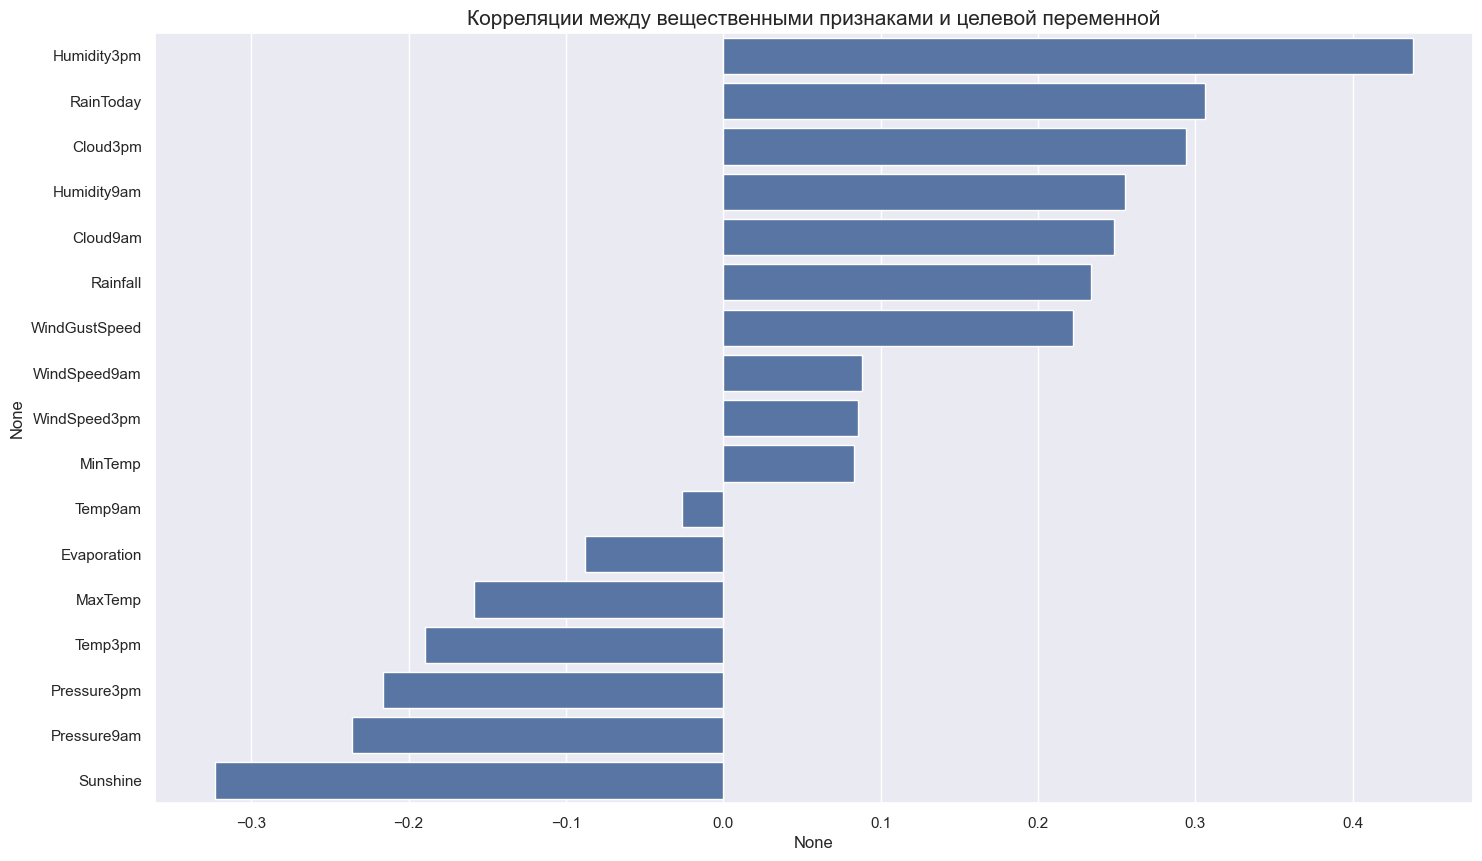

In [28]:
correlations = X_train[numeric_features].corrwith(y_train).sort_values(ascending=False)
plot = sns.barplot(y=correlations.index, x=correlations)
plot.set_title("Корреляции между вещественными признаками и целевой переменной", size=15)
plot.figure.set_size_inches(17, 10)

Для оценки качества классификации воспользуемся реализованными в sklearn logloss и ROC AUC. ROC AUC является метрикой по умолчанию для бинарной классификации, поскольку очень устойчива к несбалансированности классов. Подробнее про неё можно прочитать https://alexanderdyakonov.wordpress.com/2017/07/28/auc-roc-площадь-под-кривой-ошибок/ . Обучим  логистическую регрессию на вещественных признаках, не подбирая константу регуляризации

In [43]:
from sklearn.metrics import log_loss, roc_auc_score

In [44]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train[numeric_features], y_train)

LogisticRegression(max_iter=1000)

In [45]:
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
y_train_pred = model.predict_proba(X_train[numeric_features])[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.3635
Train logloss = 0.3695
Test roc auc score = 0.8603
Train roc auc score = 0.8564


### <font color='DarkOrange'> **Задание 4 [0.35 балла]** </font>

Сколько итераций понадобилось для обучения логистической регрессии?

<font color='MediumOrchid'>**Ваш ответ тут:**</font>
Понадобилось 1000 итераций, это говорит о том, что модель закончила обучение не по достижению определённого качества, а по превышению максимального числа итераций

In [46]:
model.n_iter_

array([1000])

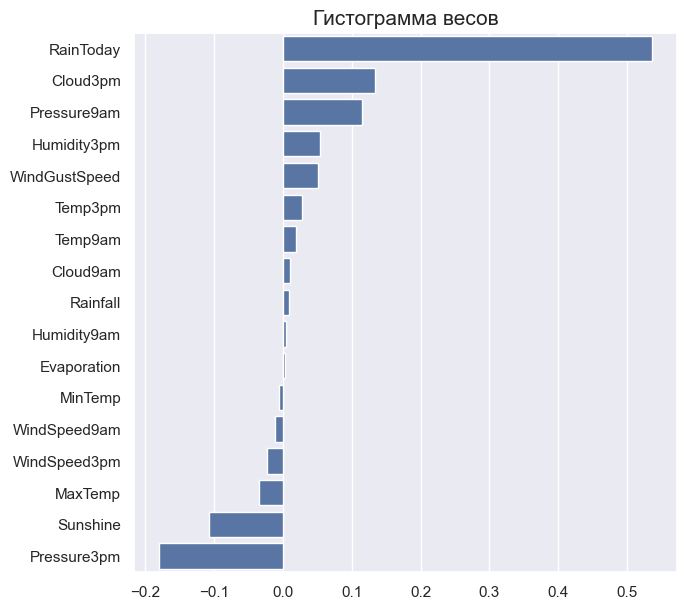

In [39]:
plt.figure(figsize=(7, 7))
sorted_weights = sorted(zip(model.coef_[0], numeric_features), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
_ = sns.barplot(y=features, x=weights).set_title("Гистограмма весов", size=15)

Если приглядеться к весам, то можно увидеть, что между корреляциями признаков с целевой переменной и значением соответствующих весов мало общего. Чтобы это предотвратить, будем масштабировать наши признаки перед обучением модели. Это, среди, прочего, сделает нашу регуляризацию более честной: теперь все признаки будут регуляризоваться в равной степени.

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

In [41]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

### <font color='DarkOrange'> **Задание 5 [0.35 балла]** </font>

А сколько итераций потребовалось теперь? Как это связано с модельными примерами, на которых мы разбирали разные методы оптимизации?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> Понадобилось 27 итераций. Такая разница наглядно демонстрирует то, насколько хуже **LBFGS** работает с неотмаштабированными данными

In [42]:
model.n_iter_

array([27])

In [47]:
y_pred = model.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model.predict_proba(X_train_scaled)[:, 1]

print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Train logloss = %.4f" % log_loss(y_train, y_train_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))
print("Train roc auc score = %.4f" % roc_auc_score(y_train, y_train_pred))

Test logloss = 0.6354
Train logloss = 0.6358
Test roc auc score = 0.8050
Train roc auc score = 0.8030


### <font color='DarkOrange'> **Задание 6 [0.7 балла]** </font>

Сравните получившееся качество с качеством до нормализации. Объясните, почему оно изменилось, хотя мы применяли линейную модель к линейно преобразованным признакам? Могло ли качество измениться в другую сторону?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> Так как масштибрование сглаживает чрезмерное влияние признаков со слишком большими абсолютными значениями, то оно способствует более точному нахождению минимума функции потерь.

Хотя мы применяем линейную модель к линейно преобразованным признакам, и, теоретически, это не должно влиять на предсказательную способность модели, на практике результаты могут измениться по следующим причинам:
1. Влияние численной стабильности и точности вычислений на процесс оптимизации.
2. Различия в результате итеративного алгоритма градиентного спуска, который может сходиться к разным локальным минимумам в зависимости от начального масштаба признаков.

Также, качество модели могло быть ухудшено. Это возможно, если бы данные были неправильно масштабированы или если бы масштабирование привело к потере важной информации о структуре данных (например, если в данных были важные порядковые отношения, которые были нарушены масштабированием).

Наряду с параметрами (веса $w$, $w_0$), которые модель оптимизирует на этапе обучения, у модели есть и гиперпараметры. У нашей модели это alpha — коэффициент регуляризации. Подбирают его обычно по сетке, измеряя качество на валидационной (не тестовой) выборке или с помощью кросс-валидации. Посмотрим, как это можно сделать (заметьте, что мы перебираем alpha по логарифмической сетке, чтобы узнать оптимальный порядок величины).

### <font color='DarkOrange'> **Задание 7 [0.35 балла]** </font>
Чем отличаются валидационная и тестовая выборки?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> Валидационная выборка используется на этапе перебора гиперпараметров и оценки модели. Тестовая же выборка, напротив, применяется только тогда, когда нам необходимо оценить качество получившейся модели. Такое жёсткое разделение необходимо для того, чтобы мы имели возможность протестировать модель на тех данных, которые она никогда не "видела"

Best C = 11.2534


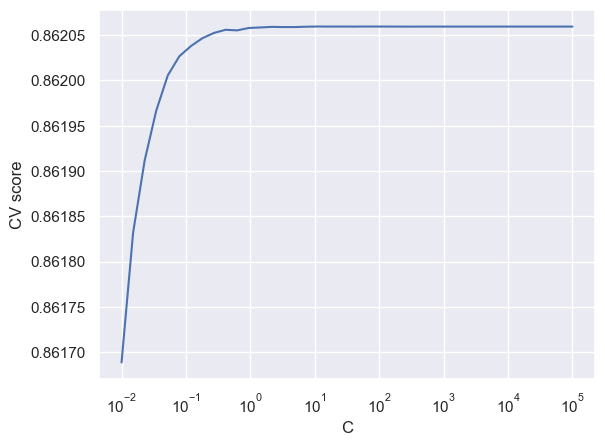

In [48]:
#ВНИМАНИЕ!!! Эта ячейка может считаться несколько минут, не пугайтесь)

from sklearn.model_selection import GridSearchCV

C = np.logspace(-2, 5, 40)
searcher = GridSearchCV(LogisticRegression(solver='lbfgs'), [{"C": C}], scoring="roc_auc", cv=10)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

print("Best C = %.4f" % best_C)

_ = plt.plot(C, searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("C")
plt.ylabel("CV score")
plt.show()

### <font color='DarkOrange'> **Задание 8 [0.7 балла]** </font>

Почему с ростом $C$ качество не падает, хотя модель должна недообучаться?

<font color='LightSteelBlue'>**Подсказка**</font> Внимательно прочитайте документацию к реализации логистической регрессии в sklearn

<font color='MediumOrchid'>**Ваш ответ тут:**</font> В рекомендованной к прочтению документации к `scikit-learn` упоминается, что для логистической регрессии регуляризация осуществляется обратно пропорционально $C$. Это означает, что с увеличением $C$ регуляризация становится слабее, что может давать модели большие возможности  для подгонки под данные, но без дополнительного риска переобучения.

Помимо этого, логистическая регрессия является относительно простой моделью, поэтому она может не достичь состояния переобучения так же легко, как более сложные модели.

### <font color='DarkOrange'> **Задание 9 [0.7 балла]** </font>

Почему мы не подбираем коэффициент регуляризации по обучающей выборке? По тестовой выборке?


<font color='MediumOrchid'>**Ваш ответ тут:**</font> Мы не используем подбор коэффициента регялризации на **обучающей выборке**, так как подобные действия могут способствовать подгонки модели только под конкретные данные (переобучение), однако она также плохо будет отражать реальные данные.

Подбирать же параметры регуляризации по тестовой выборке нельза в силу того, что я уже описывал в пункте 7, т.е. данные являются "закрытыми" для модели, так как если их не закрыть, то модель также может "подогнатсья" под них и тестирование станет нерепрезентативным.

----

Попробуем обучить модель с подобранным коэффициентом регуляризации. Заодно воспользуемся удобным классом Pipeline: обучение модели часто представляется как последовательность некоторых действий с обучающей и тестовой выборками (например, сначала нужно отмасштабировать выборку (причем для обучающей выборки нужно применить метод fit, а для тестовой — transform), а затем обучить/применить модель (для обучающей fit, а для тестовой — predict). Pipeline позволяет хранить эту последовательность шагов и корректно обрабатывает разные типы выборок: и обучающую, и тестовую. Однако, если ваши модели не укладываются в использование простых fit, transform и predict, то этот класс вам не подойдёт

In [49]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict_proba(X_test[numeric_features])[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3589
Test roc auc score = 0.8652


### <font color='DarkOrange'> **Задание 10 [0.7 балла]** </font>
Почему качество не выросло?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> Как мы видели выше, с ростом значения $C$ выше $10^1$ качество модели значительно не улучшалось

По приведённому мной коду и данным из этого ноутбука, можно сделать вывод, что используемые метрики могут иметь некоторые пределы, до которых их можно улучшить на какой-то конкретной задаче. Подобные же пределы могут существовать и для каких-то простых моделей, к примеру логичтической регрессии.

In [52]:
model1 = LogisticRegression(solver='lbfgs', max_iter=1000)
model1.fit(X_train_scaled, y_train)
y_pred = model1.predict_proba(X_test_scaled)[:, 1]
y_train_pred = model1.predict_proba(X_train_scaled)[:, 1]

print("Logloss = %.6f" % log_loss(y_test, y_pred))
print("Roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C без GridSearch:", model1.C)

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('classification', LogisticRegression(solver='lbfgs', C=best_C))
])

print("________________________________"*3)
model_2 = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model_2.predict_proba(X_test[numeric_features])[:, 1]
print("Logloss = %.6f" % log_loss(y_test, y_pred))
print("Roc auc score = %.6f" % roc_auc_score(y_test, y_pred))

print("Значение C с GridSearch:", model_2.named_steps['classification'].C)

Logloss = 0.358869
Roc auc score = 0.865176
Значение C без GridSearch: 1.0
________________________________________________________________________________________________
Logloss = 0.358868
Roc auc score = 0.865177
Значение C с GridSearch: 11.253355826007645


Рассмотрим теперь категориальные признаки. Сразу отметим, что признак "Date" очень опасен, и лучше пока его выкинуть. Это связано с тем, что мы можем получить прямую информацию о том, будет ли завтра дождь, если текущее место и завтрашняя дата встречались где-то в обучающей выборке. Очень часто также встречаются признак наподобие "ID", которые могут содержать аналогичные утечки информации. С такими признаками всегда нужно обращаться осторожно!

In [53]:
categorical = list(X_train.drop(columns=["Date"]).dtypes[X_train.dtypes == "object"].index)
X_train[categorical] = X_train[categorical].fillna("NotGiven")
X_test[categorical] = X_test[categorical].fillna("NotGiven")

Для работы с категориальными признаками нужно их как-то закодировать числами. В базовой части мы воспользовались реализацией one-hot кодирования из библиотеки sklearn. Однако сегодня мы не будем пользоваться библиотечными методами:)

Если последующий код выполнятеся слишком медленно, то вероятно Вы реализовали MyOneHotEncoder без использования векторных операций из библиотеки numpy.

In [54]:
from sklearn.compose import ColumnTransformer

column_transformer = ColumnTransformer([
    ('ohe', MyOneHotEncoder(), categorical),
    ('scaling', StandardScaler(), numeric_features)
])

pipeline = Pipeline(steps=[
    ('ohe', column_transformer),
    ('classification', LogisticRegression(solver='lbfgs', max_iter=200))
])

model = pipeline.fit(X_train.drop(columns=["Date"]), y_train)
y_pred = model.predict_proba(X_test.drop(columns=["Date"]))[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3498
Test roc auc score = 0.8721


Качество немного выросло, если смотреть на ROC AUC! Можете даже сравнить с тем, что получилось в базовой части (должно быть одинаково)

Давайте попробуем счётчики.

Напомним, что счётчики преобразуют категориальный признак в три значения:

1. Доля counts объектов в обучающей выборке с таким же значением признака. $$\begin{align}
successes_j(c) = \frac{1}{n} \sum_{i=1}^n [f_j(x_i) = c]
\end{align}$$
2. Доля successes объектов первого класса ($y = 1$) в обучающей выборке с таким же значением признака. $$\begin{align}
counts_j(c) = \frac{1}{n * counts_j(c)} \sum_{i=1}^n[f_j(x_i) = c][y_i = +1].
\end{align}$$
2. Сглаженное отношение двух предыдущих величин: $$\begin{align}
p_j(c) = \frac{successes_j(c) + a}{counts_j(c) + b},
\end{align}$$

**Обратите внимание!** Если Ваша реализация счётчиков работает очень долго, то вероятнее всего, Вы плохо векторизовали код. Попробуйте использовать np.vectorize

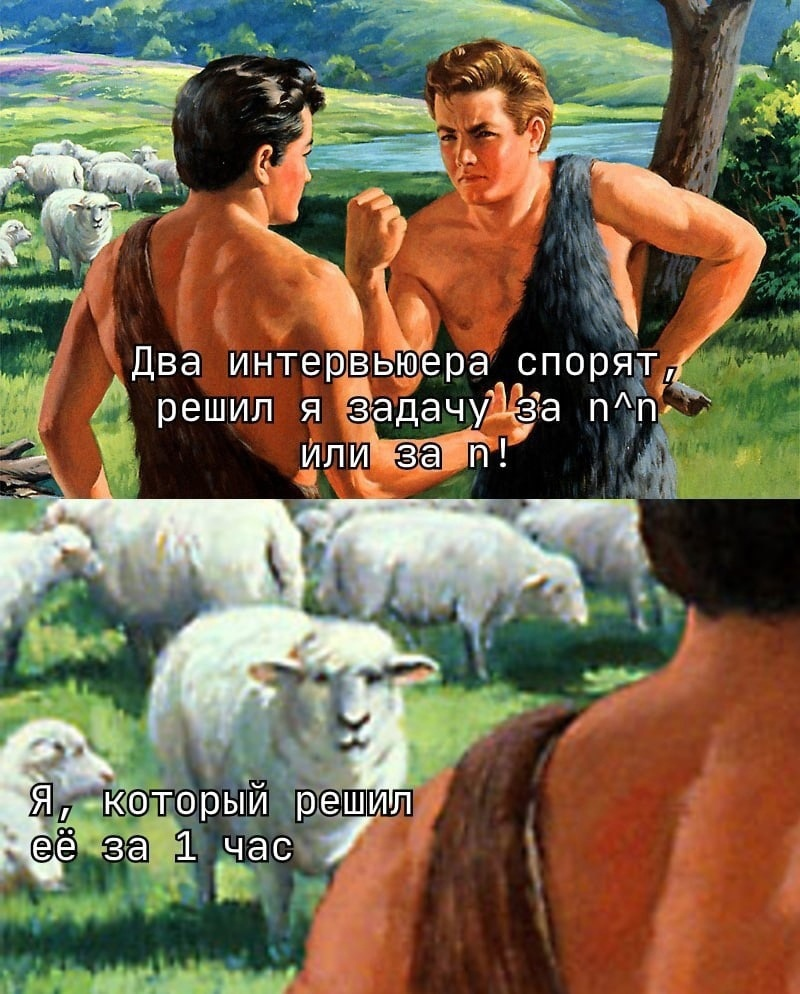

In [55]:
scal = StandardScaler()

enc_train = FoldCounters()
enc_train.fit(X_train[categorical], y_train)
X_train_counters = enc_train.transform(X_train[categorical])

enc_test = SimpleCounterEncoder()
enc_test.fit(X_train[categorical], y_train)
X_test_counters = enc_test.transform(X_test[categorical])

X_train_preprocessed = scal.fit_transform(np.hstack((X_train[numeric_features].to_numpy(), X_train_counters)))
X_test_preprocessed = scal.transform(np.hstack((X_test[numeric_features].to_numpy(), X_test_counters)))

model = LogisticRegression(solver="lbfgs")
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict_proba(X_test_preprocessed)[:, 1]
print("Test logloss = %.4f" % log_loss(y_test, y_pred))
print("Test roc auc score = %.4f" % roc_auc_score(y_test, y_pred))

Test logloss = 0.3575
Test roc auc score = 0.8666


### <font color='DarkOrange'> **Задание 11 [0.7 балла]** </font>

Счётчики показывают худшее качество по AUC ROC, нежели OneHotEncoding. В чём же преимущества счётчиков?

<font color='MediumOrchid'>**Ваш ответ тут:**</font> Несмотря на увеличение качества, при использовании `OneHotEncoding` могут возникать следующие проблемы:
1. Значительное увеличение размерности изначального набора признаков. Особенно это актуально в том случае, когда категриальные признаки имеют большое кол-во разных категорий. В то время как счётчики размерность исходных признаков не изменяют
2. Появление сильно разряженных данных. При использовании `OHE` появляется большое кол-во стобцов, где значительная часть данных нулевая. Это приводит к трудности обработки подобных данных, равно как и к появлению в них шума.
3. `OHE` может привести к переобучению, если есть категории с очень маленьким числом наблюдений. Счетчики могут обеспечить лучшее обобщение, используя статистику на основе целевой переменной.

**Выводы** Во второй части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужно нормализовать данные.
2.   Как работать с вещественными и категориальными признаками.
3.   Как интерпретировать результат обучения линейной модели, опираясь на описание обучающих данных
4.   Если есть библиотека, которая делает то, что Вам нужно, то почему бы ей не воспользоваться?)

-----------
<font color="white" style="opacity:0.2023"></font>